# Probability Distributions 1 and 2

Learning contents:

1. Frequenist's approach
    - Bernoulli distribution function
    - Maximum Likelihood
    - Display distribution
2. Bayesian approach
    - Binomial distribution
    - Display Binomial distribution for different m
    - Maximum posterior
3. Multinomial variables
    - Generate data
    - Frequenist's approach
        - Multinomial Bernoulli distribution function
        - Maximum likelihood
4. Gaussian distribution
    - Distribution function
    - Generate data
    - Display data
    - Frequenist's approach
        - Maximum likelihood
        - Display distribution
    - Bayesian approach
        - Generate data
        - Variance is known, mean is unknown
        - Display mean estimation for different N

## Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import exp, sqrt
from collections import Counter
from scipy.special import comb
from scipy.stats import beta
from scipy.stats import multivariate_normal, norm

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

The code listed below defines 2 functions: `weighted_coin` gives an output of a random experiment involving a single toss of a loaded or weighted coin. The probability of getting `heads` is 0.7, whereas the probability of getting `tails` is 0.3. In the case of heads, the function outputs 1, else it outputs 0.

In [2]:
random.seed(2605)

def weighted_coin(heads=0.7, tails=0.3):
    total = heads + tails
    value = random.random() * total
    result = 0 if value <= tails else 1
    return result


def generate_data(size):
    return list(map(
        lambda i: weighted_coin(),
        range(size)
    ))


train_size = 10000
train_data = generate_data(train_size)

<BarContainer object of 2 artists>

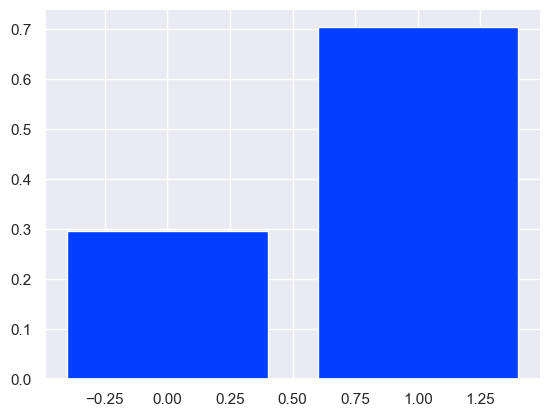

In [3]:
counter = Counter(train_data)
plt.bar(counter.keys(), list(map(lambda a: a / train_size, counter.values())))

## 1) Frequenist's approach

### 1.1) Bernoulli distribution function

The function `bern` that outputs the probability density function value of a bernoulli ramdom variable `x` and paramater `mu`. 

In [4]:
def bern(x, mu):
    return mu**x*(1-mu)**(1-x)

### 1.2) Maximum Likelihood

`function mu_maximum_likelihood_bern` takes data points train_data and returns the Maximum Likelihood estimate of the parameter `mu` of the Bernoulli distribution.

In [5]:
def mu_maximum_likelihood_bern(train_data):
    return np.mean(train_data)
    
mu_ml = mu_maximum_likelihood_bern(train_data)

### 1.3) Display distribution

The function below plots the probability density (or mass) function of a Bernoulli random variable.

In [6]:
def display_bernoulli(mu, color='b'):
    #xs = np.linspace(0., 1., 100)
    ys = list(map(
        lambda x: bern(x, mu),
        [0,1]
    ))
    plt.bar([0,1],ys)

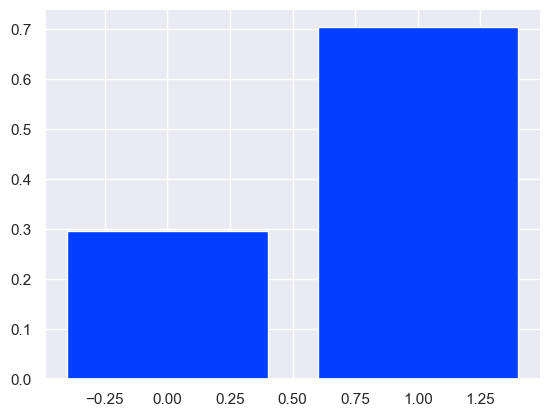

In [7]:
display_bernoulli(mu_ml)

## 2) Bayesian approach

### 2.1) Binomial distribution

Function that gives the value of probability density function for Binomial random variable with input parameters `m`, `N` and `mu`.

In [8]:
def binomial(m, N, mu):
    return comb(N,m)*mu**m*(1-mu)**(N-m)

### 2.2) Display Binomial distribution for different m

In [9]:
def display_binomial(N, mu):
    xs = list(range(N))
    ys = list(map(
        lambda m: binomial(m, N, mu),
        xs
    ))
    
    plt.bar(xs, ys)
    plt.xlabel('m')

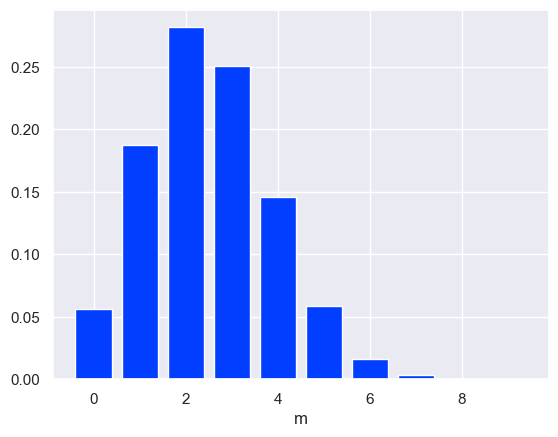

In [10]:
display_binomial(10, 0.25)

### 2.3) Maximum posterior

The mu_maximum_posterior_bern function computes the Maximum Posterior estimate of the `mu` parameter for a Bernoulli distribution, using `m` (successes), `N` (trials), and 'a', 'b' (prior parameters). It contrasts this estimate with the Maximum Likelihood Estimator, especially focusing on their behavior as the number of trials `N` increases.

In [11]:
def mu_maximum_posterior_bern(m, N, a, b):
    l = N - m
    return (m+a)/(m+a+l+b)
    

In [12]:
 print(mu_maximum_posterior_bern(sum(train_data), train_size, 0.1, 0.1))

0.7044959100817983


We see that for N very large the two estimators seem to coincide. 

## 3) Multinomial variables

### 3.1) Generate data

Generates samples of the multinomial random variable using 1-of-K scheme.

In [13]:
np.random.seed(26)

def generate_multinomial_data(size, probabilities):
    numbers = np.random.choice(len(probabilities), size, 1, probabilities)
    
    result = np.zeros((numbers.size, len(probabilities)))
    result[np.arange(numbers.size), numbers] = 1
    return result
    
probabilities=[0.5, 0.1, 0.2, 0.1, 0.1]
multinomial_data = generate_multinomial_data(100, probabilities)

### 3.2) Frequenist's approach

#### 3.2.1) Multinomial distribution function

Function that gives the value of probability density function of multinomial random variable, given the data parameters.

In [14]:
def bern_multi(xs, mus):
    prod_list = [x*mu for x,mu in zip(xs,mus)]
    prod = 1
    for i in prod_list:
        prod *= i
    return prod    

#### 3.2.2) Maximum likelihood

The `mu_maximum_likelihood_multinomial_bern` function returns Maximum Likelihood estimates of `mus` for a Multinomial distribution from multinomial_data. It prints these estimates and compares them with actual values, offering insights on aligning them more closely if they differ.




In [15]:
def mu_maximum_likelihood_multinomial_bern(multinomial_data):
    categories = multinomial_data.T
    k = 5
    N = len(multinomial_data)
    m_k = np.array(list(map(sum,categories)))
    u_ml = m_k/N
    return u_ml
    

multi_mu_ml = mu_maximum_likelihood_multinomial_bern(multinomial_data)
multi_mu_ml

array([0.46, 0.1 , 0.23, 0.06, 0.15])

## 4) Gaussian distribution

### 4.1) Multivariate Gaussian Distribution Function

Function that gives the value of probability density function of Gaussian random variable, given the data point 'x' and parameters 'mean' and 'variance'.

In [16]:
def multi_gaussian(x, mean, covariance):
    return scipy.stats.multivariate_normal(x,mean,covariance)

### 4.2) Generate data

Function to generate `size` number of random samples from multivariate Gaussian distribution with specified mean and covariance.

In [17]:
def generate_multi_gaussian_data(size, mean, covariance):
    return np.array(multivariate_normal(mean=mean, cov=covariance).rvs(size=size, random_state=26))

target_mean = [0, 0]
target_cov = [[1, 0], [0, 5]]
multi_gaussian_data = generate_multi_gaussian_data(50, target_mean, target_cov)

### 4.3) Display data

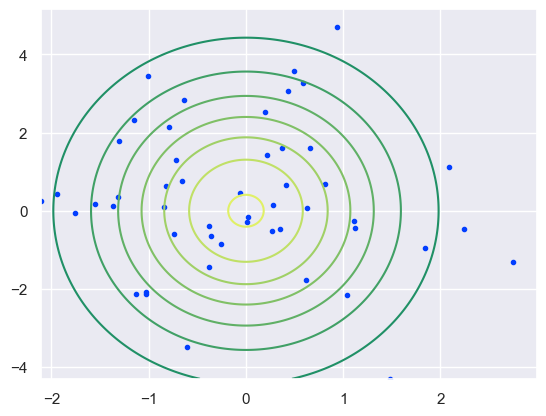

In [18]:
plt.plot(multi_gaussian_data[:, 0], multi_gaussian_data[:, 1], '.')

def display_gaussian_contour(data, mean, covariance, cmap='summer'):

    lx = min(data[:, 0])
    rx = max(data[:, 0])
    by = min(data[:, 1])
    uy = max(data[:, 1])

    x, y = np.mgrid[lx:rx:.01, by:uy:.01]
    pos = np.dstack((x, y))
    plt.contour(x, y, multivariate_normal(mean, covariance).pdf(pos), cmap=cmap)

display_gaussian_contour(multi_gaussian_data, target_mean, target_cov)

### 4.4) Parameter Estimation using Frequenist's approach

#### 4.4.1) Maximum likelihood

he `multi_gaussian_mu_maximum_likelihood` function takes Gaussian distributed data points `multi_gaussian_data` and returns Maximum Likelihood estimate of the mean of Multivariate Gaussian distribution.

In [19]:
def multi_gaussian_mu_maximum_likelihood(multi_gaussian_data):
    if len(multi_gaussian_data) == 0:
        return [0]
    return np.array(list(map(sum,multi_gaussian_data.T)))/len(multi_gaussian_data)
    
g_mu_ml = multi_gaussian_mu_maximum_likelihood(multi_gaussian_data)
g_mu_ml

array([-0.05999769,  0.2931605 ])

Function `multi_gaussian_covariance_maximum_likelihood` takes Gaussian data points `multi_gaussian_data` and Maximum Likelihood estimate for `mu` (`g_mu_ml`) and returns Maximum Likelihood estimate of the covariance matrix of that distribution.

In [20]:
def multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml):
    N = len(multi_gaussian_data)
    sigma = list(map(lambda x: np.outer((x-g_mu_ml),(x-g_mu_ml)),multi_gaussian_data))
    return 1/(N-1)*sum(sigma)
    
g_cov_ml = multi_gaussian_covariance_maximum_likelihood(multi_gaussian_data, g_mu_ml)
g_cov_ml

array([[ 1.21719187, -0.14299307],
       [-0.14299307,  3.30422847]])

#### 4.4.2) Display distribution

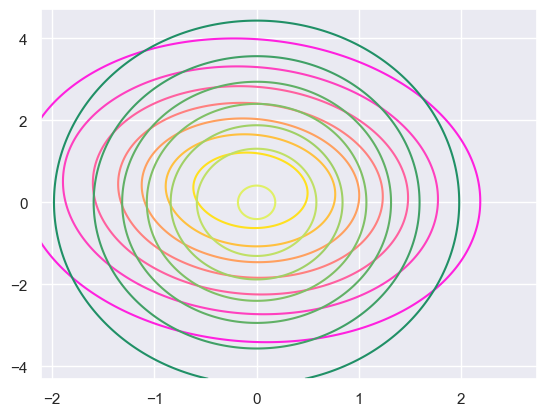

In [21]:
display_gaussian_contour(multi_gaussian_data, g_mu_ml, g_cov_ml, cmap='spring')
display_gaussian_contour(multi_gaussian_data, target_mean, target_cov, cmap='summer')

### 4.5) Parameter Estimation using Bayesian approach

#### 4.5.1) Generate data

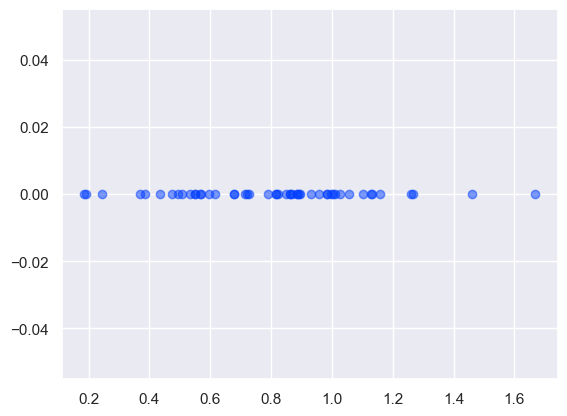

In [22]:
def generate_gaussian_data(size, mean, variance):
    return np.array(norm(mean, sqrt(variance)).rvs(size=size, random_state=26))

g_mean = 0.8
g_variance = 0.1
gaussian_data = generate_gaussian_data(50, g_mean, g_variance)

plt.scatter(gaussian_data, [0] * len(gaussian_data), alpha=0.5)

#### 4.5.2) Estimating mean distribution when the variance is known

Function `multi_gaussian_mu_maximum_posterior` takes data points `gaussian_data`, prior `mu0` and `variance0`, `variance` and returns Maximum Posterior estimate of the mean of Multivariate Gaussian distribution and its variance.

In [23]:
def multi_gaussian_mu_maximum_posterior(gaussian_data, mu0, variance0, variance):
    N = len(gaussian_data)
    mu_lm = multi_gaussian_mu_maximum_likelihood(np.array([gaussian_data]).T)
    mu_N = variance/(N*variance0+variance)*mu0 + N*variance0/(N*variance0+variance)*mu_lm[0]
    variance_N_inv = 1/variance0+N/variance
    return mu_N,1/variance_N_inv
    
g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
g_mu_map, g_mu_var_map

(0.7873049121325897, 0.00196078431372549)

#### 4.5.3) Display mean estimation for different values of N

The display_mu_map function visualizes Maximum Posterior estimates for a Gaussian distribution's mean using gaussian_data. It plots the estimates for different data subsets, showing how the distribution changes with more data. The function calculates these estimates with initial mean, prior variance, and data variance parameters.

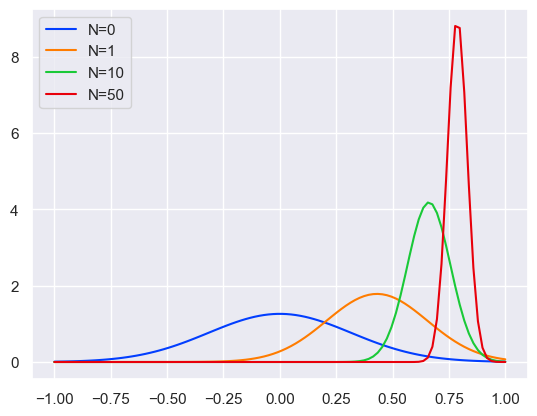

In [24]:
def display_mu_map(gaussian_data, mu0, variance0, variance):
    g_mu_map, g_mu_var_map = multi_gaussian_mu_maximum_posterior(gaussian_data, 0, g_variance, g_variance)
    x = np.linspace(-1, 1, 100)
    y = norm(g_mu_map, sqrt(g_mu_var_map)).pdf(x)
    plt.plot(x, y, label='N=' + str(len(gaussian_data)))
    plt.legend()

display_mu_map(gaussian_data[:0], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:1], 0, g_variance, g_variance)
display_mu_map(gaussian_data[:10], 0, g_variance, g_variance)
display_mu_map(gaussian_data, 0, g_variance, g_variance)